In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "C:/Users/OI/Desktop/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/OI/Desktop/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(clinical_data_df, mouse_data_df, on="Mouse ID")

# Display the data table for preview

combined_df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_tum_drg = combined_df.groupby(['Drug', 'Timepoint'])
# combined_df.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
tum_drg_df = combined_tum_drg.mean()
# Preview DataFrame
tum_drg_df = tum_drg_df[["Tumor Volume (mm3)"]]

tum_drg_df.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tum_sem = combined_tum_drg.sem()
# Convert to DataFrame
tum_sem.head()
# Preview DataFrame
tum_sem = tum_sem[["Tumor Volume (mm3)"]]
tum_sem.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593

In [5]:
# Minor Data Munging to Re-Format the TUMOR STANDARD ERROR Data Frames
tum_sem_piviot = tum_sem.pivot_table('Tumor Volume (mm3)',['Timepoint'], 'Drug')
# Preview that Reformatting worked
tum_sem_piviot.head(1)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tum_drg_df_piviot = tum_drg_df.pivot_table('Tumor Volume (mm3)',['Timepoint'], 'Drug')
# Preview that Reformatting worked
tum_drg_df_piviot.head(1)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0


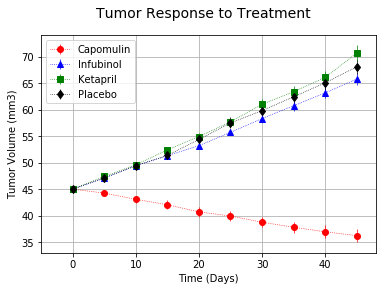

In [10]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

fig, ax = plt.subplots()

fig.suptitle("Tumor Response to Treatment", fontsize=14 )

ax.set_xlim(-5, 48)
ax.set_ylim(33, 74)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

ax.errorbar(x_axis, tum_drg_df_piviot.Capomulin.values, yerr=tum_sem_piviot.Capomulin.values, linestyle=':', linewidth=0.7, marker='o', color="r", label="Capomulin")
ax.errorbar(x_axis, tum_drg_df_piviot.Infubinol.values, yerr=tum_sem_piviot.Infubinol.values, linestyle=':', linewidth=0.7, marker='^', color="b", label="Infubinol")
ax.errorbar(x_axis, tum_drg_df_piviot.Ketapril.values, yerr=tum_sem_piviot.Ketapril.values, linestyle=':', linewidth=0.7, marker='s', color="g", label="Ketapril")
ax.errorbar(x_axis, tum_drg_df_piviot.Placebo.values, yerr=tum_sem_piviot.Placebo.values, linestyle=':', linewidth=0.7, marker='d', color="k",  label="Placebo")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("C:/Users/OI/Desktop/tum_resp.png")
#print figure
plt.show()


## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_met_drg = combined_df.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
met_drg_df = combined_met_drg.mean()
# Preview DataFrame
met_drg_df = met_drg_df[["Metastatic Sites"]]

met_drg_df.head(2)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16

In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = combined_met_drg.sem()
# Convert to DataFrame
met_sem = met_sem[["Metastatic Sites"]]
# Preview DataFrame
met_sem.head(2)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833

In [23]:
# Minor Data Munging to Re-Format the METASTATIC STANDARD ERROR Data Frames
met_sem_piviot = met_sem.pivot_table("Metastatic Sites",['Timepoint'], 'Drug')
# Preview that Reformatting worked
met_sem_piviot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


In [22]:
# Minor Data Munging to Re-Format the Data Frames
met_drg_df_piviot = met_drg_df.pivot_table("Metastatic Sites",['Timepoint'], 'Drug')
# Preview that Reformatting worked
met_drg_df_piviot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


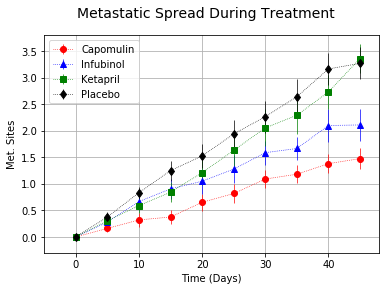

In [32]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

fig, bx = plt.subplots()

fig.suptitle("Metastatic Spread During Treatment", fontsize=14 )

bx.set_xlim(-5, 48)
bx.set_ylim(-0.3, 3.8)

bx.set_xlabel("Time (Days)")
bx.set_ylabel("Met. Sites")

bx.errorbar(x_axis, met_drg_df_piviot.Capomulin.values, yerr=met_sem_piviot.Capomulin.values, linestyle=':', linewidth=0.7, marker='o', color="r", label="Capomulin")
bx.errorbar(x_axis, met_drg_df_piviot.Infubinol.values, yerr=met_sem_piviot.Infubinol.values, linestyle=':', linewidth=0.7, marker='^', color="b", label="Infubinol")
bx.errorbar(x_axis, met_drg_df_piviot.Ketapril.values, yerr=met_sem_piviot.Ketapril.values, linestyle=':', linewidth=0.7, marker='s', color="g", label="Ketapril")
bx.errorbar(x_axis, met_drg_df_piviot.Placebo.values, yerr=met_sem_piviot.Placebo.values, linestyle=':', linewidth=0.7, marker='d', color="k",  label="Placebo")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("C:/Users/OI/Desktop/met_spread.png")
# #print figure
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

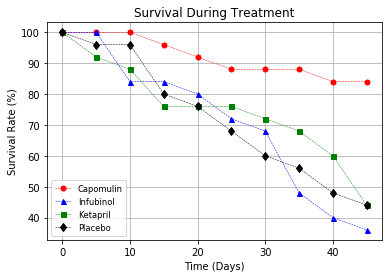

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

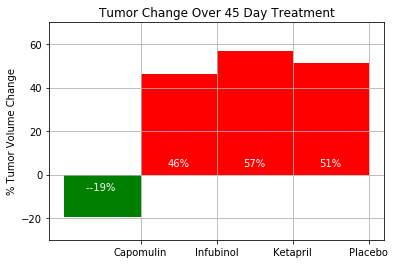